In [37]:
#Before getting started with any data analysis, clearly define your question, and then identify dataset(s) that can help you explore ways to answer that question.
#Python is a programming language filled with useful "packages" or tools, to help you with your work. Let's start by importing one of them.

import bs4
from bs4 import BeautifulSoup
import requests
import urllib3

html = "https://www.ciaboc.gov.lk/prosecute/convictions?start=1"
resp = requests.get(html)
txt=resp.text
soup=BeautifulSoup(txt,"html.parser")
   
divs=soup.findAll('div',{"class":"entry-info-wrap"})
print(divs)

#This section of the code uses Requests to pull in the html from the url we input.
#Then BeautifulSoup is used to ingest the html and retrieve all <div class="entry-info-wrap"> tags in the html. We knew to look for this after a short review of the HTML code itself.

[<div class="entry-info-wrap">
<div class="entry-header">
<!-- post formate icon -->
<!-- title -->
<h2 itemprop="name">
<a href="/prosecute/convictions/649-hcb-2040" itemprop="url">
					HCB 2040</a>
</h2>
<!-- post info -->
<dl class="article-info">
<dt class="article-info-term"></dt>
<dd class="create">
<time data-toggle="tooltip" datetime="2018-07-07T09:04:33+05:30" itemprop="dateCreated" title="Created Date">
		07 July 2018	</time>
</dd>
</dl>
</div>
<div class="entry-intro-text">
<p>Open Inquiry - offering of a bribe to a public servant.</p>
<p><a href="/images/convictions/2018/2040eng.pdf" target="_blank"><img alt="view synocopy" height="57" src="/images/buttons/view_synocopy.jpg" width="200"/></a></p>
</div>
<p class="readmore">
<a class="btn btn-default" href="/prosecute/convictions/649-hcb-2040" itemprop="url">
		Read more ...	</a>
</p>
</div>, <div class="entry-info-wrap">
<div class="entry-header">
<!-- post formate icon -->
<!-- title -->
<h2 itemprop="name">
<a href="/pro

In [38]:
#Four array variables are set to capture the key data we want on each conviction case

titles=[]
dates=[]
urls=[]
summaries=[]

#A for loop runs through each <div> tag in our set and extracts the four pieces of data we want 
#then adds that data to the respective array variable
for div in divs:
    title=div.h2.text
    titles.append(title)
    date=div.time.text
    dates.append(date)
    url=div.a['href']
    urls.append("https://www.ciaboc.gov.lk"+url)
    summary=div.p.text
    summaries.append(summary)
   
print(titles)

['\n\n\t\t\t\t\tHCB 2040\n', '\n\n\t\t\t\t\tField Labour officer attached to Labour  Office of Badulla convicted for offence of Bribery\n', '\n\n\t\t\t\t\tDivisional Secretary convicted for taking bribes\n', '\n\n\t\t\t\t\tSentenced 14 years rigorous imprisonment to a former Inland Revenue Tax officer\n', '\n\n\t\t\t\t\tHCB 2036/14\n', '\n\n\t\t\t\t\tHCB 23703/1/2013\n', '\n\n\t\t\t\t\tHCB 2142/2016\n', '\n\n\t\t\t\t\tHCB 26/2017\n', '\n\n\t\t\t\t\tPrincipal convicted for accepting a bribe of Rs.40,000/- to admit a child to the school.\n', '\n\n\t\t\t\t\tHCB 2082/15\n', '\n\n\t\t\t\t\tHCB 1929/12\n', '\n\n\t\t\t\t\t HCB 1810/ 2009\n']


In [39]:
print (dates)

['\n\t\t07 July 2018\t', '\n\t\t30 May 2018\t', '\n\t\t22 May 2018\t', '\n\t\t11 May 2018\t', '\n\t\t04 May 2018\t', '\n\t\t11 April 2018\t', '\n\t\t22 March 2018\t', '\n\t\t20 March 2018\t', '\n\t\t09 March 2018\t', '\n\t\t30 January 2018\t', '\n\t\t29 January 2018\t', '\n\t\t28 November 2017\t']


In [40]:
#Checking the urls
print (urls)

['https://www.ciaboc.gov.lk/prosecute/convictions/649-hcb-2040', 'https://www.ciaboc.gov.lk/prosecute/convictions/632-field-labour-officer-attached-to-labour-office-of-badulla-convicted-for-offence-of-bribery', 'https://www.ciaboc.gov.lk/prosecute/convictions/628-divisional-secretary-convicted-for-taking-bribes', 'https://www.ciaboc.gov.lk/prosecute/convictions/624-sentenced-14-years-rigorous-imprisonment-to-a-former-inland-revenue-tax-officer', 'https://www.ciaboc.gov.lk/prosecute/convictions/619-hcb-2036-14', 'https://www.ciaboc.gov.lk/prosecute/convictions/609-23703-1-2013', 'https://www.ciaboc.gov.lk/prosecute/convictions/599-hcb-2142-2016', 'https://www.ciaboc.gov.lk/prosecute/convictions/597-hcb-26-2017', 'https://www.ciaboc.gov.lk/prosecute/convictions/596-principal-convicted-for-accepting-a-bribe-of-rs-40-000-to-admit-a-child-to-the-school', 'https://www.ciaboc.gov.lk/prosecute/convictions/591-hcb-2082-15', 'https://www.ciaboc.gov.lk/prosecute/convictions/590-hcb-1929-12', 'htt

In [41]:
#Checking the conviction summary text
print (summaries)

['Open Inquiry - offering of a bribe to a public servant.', '', '', 'Honourable High court judge sentenced 14 years rigorous imprisonment to a former Inland Revenue Tax officer attached to Anuradhapura Inland Revenue Department for accepting Rs.15,000 as a bribe.', '\xa0', 'Honourable Magistrate imposed two years rigorous imprisonment to a Police Constable attached to Veyangoda Police Station for obtaining Rs.2000/- as a bribe.', 'Engineering Assistant ordered to pay 1.2Mn as a fine.', 'Accused was ordered to pay Rs.250,000/-', 'Principal convicted for accepting a bribe of Rs.40,000/- to admit a child to the school.', 'Former Technical Officer of Thanamalwila Local Council pleaded guilty.', '8 years Imprisonment by 4 years for each charge with fines for the two Minor Employees attached to the Mahamodara Hospital in Galle,', '20 years rigorous imprisonment by 5 years for each charge for the Technical Officer of Elahera Divisional Secretariat.']


In [60]:
#Pandas is used to build a data frame for each conviction record, based on our arrays

import pandas as pd
convictions_df=pd.DataFrame({'title':titles,
                            'date':dates,
                            'url':urls,
                            'summary':summaries})
convictions_df

,date,summary,title,url
0,\n\t\t07 July 2018\t,Open Inquiry - offering of a bribe to a public...,\n\n\t\t\t\t\tHCB 2040\n,https://www.ciaboc.gov.lk/prosecute/conviction...
1,\n\t\t30 May 2018\t,,\n\n\t\t\t\t\tField Labour officer attached to...,https://www.ciaboc.gov.lk/prosecute/conviction...
2,\n\t\t22 May 2018\t,,\n\n\t\t\t\t\tDivisional Secretary convicted f...,https://www.ciaboc.gov.lk/prosecute/conviction...
3,\n\t\t11 May 2018\t,Honourable High court judge sentenced 14 years...,\n\n\t\t\t\t\tSentenced 14 years rigorous impr...,https://www.ciaboc.gov.lk/prosecute/conviction...
4,\n\t\t04 May 2018\t,,\n\n\t\t\t\t\tHCB 2036/14\n,https://www.ciaboc.gov.lk/prosecute/conviction...
5,\n\t\t11 April 2018\t,Honourable Magistrate imposed two years rigoro...,\n\n\t\t\t\t\tHCB 23703/1/2013\n,https://www.ciaboc.gov.lk/prosecute/conviction...
6,\n\t\t22 March 2018\t,Engineering Assistant ordered to pay 1.2Mn as ...,\n\n\t\t\t\t\tHCB 2142/2016\n,https://www.ciaboc.gov.lk/prosecute/conviction...
7,\n\t\t20 March 2018\t,"Accused was ordered to pay Rs.250,000/-",\n\n\t\t\t\t\tHCB 26/2017\n,https://www.ciaboc.gov.lk/prosecute/conviction...
8,\n\t\t09 March 2018\t,Principal convicted for accepting a bribe of R...,\n\n\t\t\t\t\tPrincipal convicted for acceptin...,https://www.ciaboc.gov.lk/prosecute/conviction...
9,\n\t\t30 January 2018\t,Former Technical Officer of Thanamalwila Local...,\n\n\t\t\t\t\tHCB 2082/15\n,https://www.ciaboc.gov.lk/prosecute/conviction...


In [61]:
#Clean the title and date data
convictions_df = convictions_df.replace(r'\n',' ', regex=True) 
convictions_df = convictions_df.replace(r'\t',' ', regex=True) 

convictions_df

,date,summary,title,url
0,07 July 2018,Open Inquiry - offering of a bribe to a public...,HCB 2040,https://www.ciaboc.gov.lk/prosecute/conviction...
1,30 May 2018,,Field Labour officer attached to Labour...,https://www.ciaboc.gov.lk/prosecute/conviction...
2,22 May 2018,,Divisional Secretary convicted for taki...,https://www.ciaboc.gov.lk/prosecute/conviction...
3,11 May 2018,Honourable High court judge sentenced 14 years...,Sentenced 14 years rigorous imprisonmen...,https://www.ciaboc.gov.lk/prosecute/conviction...
4,04 May 2018,,HCB 2036/14,https://www.ciaboc.gov.lk/prosecute/conviction...
5,11 April 2018,Honourable Magistrate imposed two years rigoro...,HCB 23703/1/2013,https://www.ciaboc.gov.lk/prosecute/conviction...
6,22 March 2018,Engineering Assistant ordered to pay 1.2Mn as ...,HCB 2142/2016,https://www.ciaboc.gov.lk/prosecute/conviction...
7,20 March 2018,"Accused was ordered to pay Rs.250,000/-",HCB 26/2017,https://www.ciaboc.gov.lk/prosecute/conviction...
8,09 March 2018,Principal convicted for accepting a bribe of R...,Principal convicted for accepting a bri...,https://www.ciaboc.gov.lk/prosecute/conviction...
9,30 January 2018,Former Technical Officer of Thanamalwila Local...,HCB 2082/15,https://www.ciaboc.gov.lk/prosecute/conviction...


In [75]:
import datetime

#(2) build a time-series table of convictions per month
convictions_df['date'] =  pd.to_datetime(convictions_df['date'])
convictions_ts_month = convictions_df.set_index('date').resample('MS').size()
convictions_ts_month

date
2017-11-01    1
2017-12-01    0
2018-01-01    2
2018-02-01    0
2018-03-01    3
2018-04-01    1
2018-05-01    4
2018-06-01    0
2018-07-01    1
Freq: MS, dtype: int64

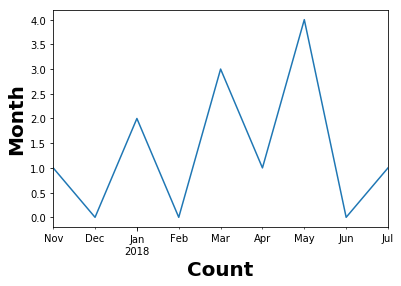

In [97]:
%matplotlib inline

import matplotlib.pyplot as plt

#(3) build a time-series chart of convictions per month
convictions_ts_month.plot(kind="line")
plt.xlabel('Count',fontsize=20, fontweight='bold')
plt.ylabel('Month',fontsize=20, fontweight='bold')

#convictions_ts_month.plot()